In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
# training svm model on 'cleaned_training_dataset' csv file having newly added more extra features all 16 
df = pd.read_csv('../output/cleaned_training_dataset.csv')
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity,ngrams,common prefix,common suffix,common prefix suffix
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,True,False,72.222222,0.816497,0.750000,100.000000,0.000000,72.222222
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,True,False,83.333333,0.666667,0.684211,82.352941,0.000000,66.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,False,True,2.941176,0.750000,0.812500,0.000000,81.250000,65.000000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,True,True,59.259259,0.750000,0.807692,61.538462,34.615385,89.285714
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,True,False,82.352941,0.816497,0.812500,100.000000,0.000000,82.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,False,False,5.128205,0.000000,0.057692,0.000000,11.538462,4.838710
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,False,False,2.000000,0.169031,0.121212,0.000000,0.000000,0.000000
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,False,False,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,False,False,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000


In [ ]:
# Convert True/False column to numerical values
df['first word match'] = df['first word match'].astype(int)
df['last word match'] = df['last word match'].astype(int)

In [ ]:
# confirming the dimensions of the dataset
print(df.shape)

(621, 16)


In [ ]:
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity,ngrams,common prefix,common suffix,common prefix suffix
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,1,0,72.222222,0.816497,0.750000,100.000000,0.000000,72.222222
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,1,0,83.333333,0.666667,0.684211,82.352941,0.000000,66.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,0,1,2.941176,0.750000,0.812500,0.000000,81.250000,65.000000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,1,1,59.259259,0.750000,0.807692,61.538462,34.615385,89.285714
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,1,0,82.352941,0.816497,0.812500,100.000000,0.000000,82.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,0,0,5.128205,0.000000,0.057692,0.000000,11.538462,4.838710
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,0,0,2.000000,0.169031,0.121212,0.000000,0.000000,0.000000
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,0,0,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,0,0,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000


In [ ]:
# Let’s also look at the data types of each attribute
print(df.dtypes)

Company Name                      object
Similar Name                      object
Target                             int64
Simple Ratio                       int64
partial Ratio                      int64
Token Sort Ratio                   int64
Token Set Ratio                    int64
word match percentage            float64
first word match                   int32
last word match                    int32
character_matching_percentage    float64
cosine similarity                float64
ngrams                           float64
common prefix                    float64
common suffix                    float64
common prefix suffix             float64
dtype: object


In [ ]:
df.describe()

,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity,ngrams,common prefix,common suffix,common prefix suffix
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,0.394525,69.985507,82.603865,69.027375,79.544283,47.877620,0.731079,0.330113,50.680407,0.581946,0.553219,62.838647,23.088653,38.977901
std,0.489142,25.883700,22.249775,25.697199,26.496805,33.914266,0.443756,0.470633,33.789069,0.351867,0.336327,38.802785,37.357316,37.864168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,73.000000,49.000000,67.000000,20.000000,0.000000,0.000000,19.444444,0.377964,0.250000,33.333333,0.000000,0.000000
50%,0.000000,76.000000,92.000000,75.000000,92.000000,50.000000,1.000000,0.000000,51.282051,0.670820,0.586207,70.731707,0.000000,33.333333
75%,1.000000,93.000000,100.000000,92.000000,100.000000,71.428571,1.000000,1.000000,76.923077,0.833333,0.857143,100.000000,29.411765,69.230769
max,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,100.000000,193.750000


In [ ]:
# class distribution : same:1 , different:0
print(df.groupby('Target').size())
# means we must have same no. of records count in both categories (more balanced model created)
# diff. between same / diff record count must be minimum

Target
0    376
1    245
dtype: int64


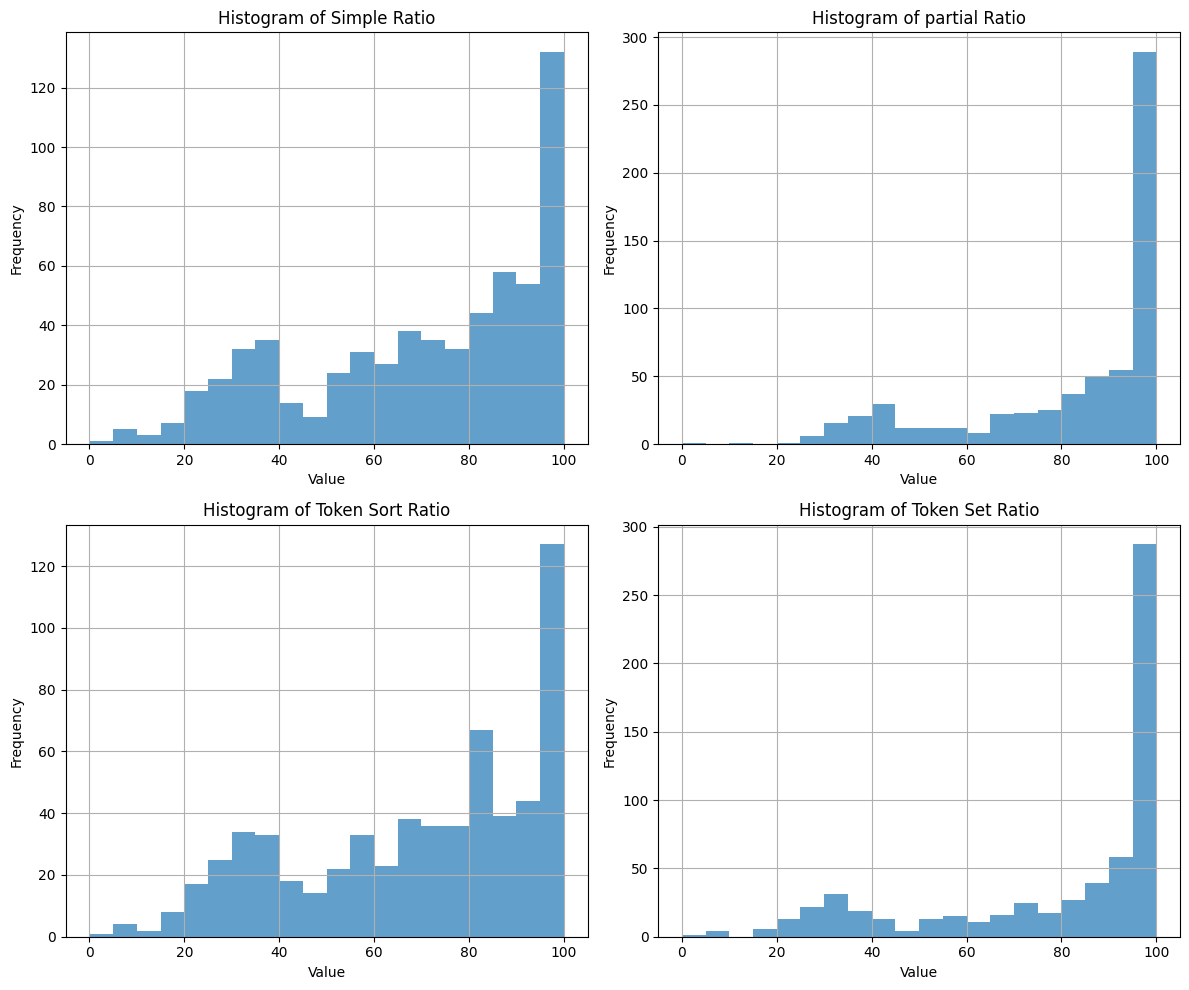

In [ ]:
# visualizations of individual attributes
import matplotlib.pyplot as plt

# Assuming 'Simple Ratio', 'Partial Ratio', 'Token Sort Ratio', 'Token Set Ratio' are the columns of interest
ratio_columns = ['Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio']

# Create separate histogram plots for each ratio column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(ratio_columns):
    axes[i].hist(df[column], bins=20, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Observation: Most of records in dataset having values of these ratios ('Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio') as more than 70 till 90....hence it is challenging to recognize those records are matched or No-matched, as 100 value shows exact match but need mpore accuracy for prediction for values lie between 70 to 90.

### Validation of Dataset: 
#### good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [ ]:
df.columns

Index(['Company Name', 'Similar Name', 'Target', 'Simple Ratio',
       'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio',
       'word match percentage', 'first word match', 'last word match',
       'character_matching_percentage', 'cosine similarity', 'ngrams',
       'common prefix', 'common suffix', 'common prefix suffix'],
      dtype='object')

In [ ]:
rows_with_nan = df[df.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
Empty DataFrame
Columns: [Company Name, Similar Name, Target, Simple Ratio, partial Ratio, Token Sort Ratio, Token Set Ratio, word match percentage, first word match, last word match, character_matching_percentage, cosine similarity, ngrams, common prefix, common suffix, common prefix suffix]
Index: []


### SVM: (trying out different combinations of features to increase the accuracy)
1. for (6 attributes) : 'Simple Ratio','first word match', 'Token Sort Ratio', 'Token Set Ratio', 'character_matching_percentage', 'cosine similarity'
 * linear SVM: 0.72
 * rbf non-linear SVM: 0.744
 * poly SVM: 0.712
 * custome poly + gamma 0.001: 0.752
2. for para : 'Simple Ratio','first word match', 'Token Sort Ratio', 'Token Set Ratio', 'character_matching_percentage','cosine similarity', 'ngrams'
--  accuracy 0.8 : custome poly + gamma 0.001
3. for all 13 para => accuracy : 0.784 => Poly SVM
4. without "common prefix","suffix", "prefix suffix" => 0.798 : rbf SVM
5. for para (all 8 compulsory to get 0.816 accuracy): 'Simple Ratio', 'partial Ratio', 'Token Set Ratio', 'word match percentage', 'first word match', 'last word match', 'character_matching_percentage', 'ngrams'
--  accuracy 0.816 : custome poly + gamma 0.001


In [ ]:
# for training model, we need to split the dataframe and also its features
from sklearn.model_selection import train_test_split
# Separate features and target variable
features = [ 'Simple Ratio', 'partial Ratio', 'Token Set Ratio', 'word match percentage', 'last word match', 
            'character_matching_percentage', 'ngrams']
xn = df[features] #independent features (input columns)
yn = df['Target'] #dependent feature (output column)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Customizing Kernel Parameters: For both RBF and polynomial kernels, there are additional parameters you can tune, such as gamma for RBF
# Example with RBF kernel and customized gamma value = 0.001
svm_model_rbf_custom = SVC(kernel='poly', gamma=0.001)  # Try different gamma values, we got 0.001 as best gamma value
svm_model_rbf_custom.fit(Xn_train, yn_train)

yn_pred_rbf_custom = svm_model_rbf_custom.predict(Xn_test)

accuracy_rbf_custom = accuracy_score(yn_test, yn_pred_rbf_custom)
report_rbf_custom = classification_report(yn_test, yn_pred_rbf_custom)
print(f"Accuracy (RBF Kernel - Customized Gamma): {accuracy_rbf_custom}")
# print("Classification Report (RBF Kernel - Customized Gamma):\n", report_rbf_custom)

Accuracy (RBF Kernel - Customized Gamma): 0.816


In [ ]:
# Train SVM model  # linear: means try to capture linear relationship and draws linear hyperplane for classification of data
svm_model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'rbf', etc.
svm_model.fit(Xn_train, yn_train)

# Make predictions
yn_pred = svm_model.predict(Xn_test)

# Evaluate the model
accuracy = accuracy_score(yn_test, yn_pred)
report = classification_report(yn_test, yn_pred)
print(f"Accuracy: {accuracy}")
# print("Classification Report:\n", report)

Accuracy: 0.712


In [ ]:
# 'rbf': flexibility in capturing nonlinear relationships between data
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(Xn_train, yn_train)

yn_pred_rbf = svm_model_rbf.predict(Xn_test)

accuracy_rbf = accuracy_score(yn_test, yn_pred_rbf)
report_rbf = classification_report(yn_test, yn_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
# print("Classification Report (RBF Kernel):\n", report_rbf)

Accuracy (RBF Kernel): 0.768


In [ ]:
# Another nonlinear kernel option is the polynomial kernel. It captures polynomial relationships between features
svm_model_poly = SVC(kernel='poly')
svm_model_poly.fit(Xn_train, yn_train)

yn_pred_poly = svm_model_poly.predict(Xn_test)

accuracy_poly = accuracy_score(yn_test, yn_pred_poly)
report_poly = classification_report(yn_test, yn_pred_poly)
print(f"Accuracy (Poly Kernel): {accuracy_poly}")
# print("Classification Report (Poly Kernel):\n", report_poly)

Accuracy (Poly Kernel): 0.76


####
"Making SVM Better: Adjusting Settings for More Accurate Predictions":

In this code block, we focus on boosting the accuracy of a Support Vector Machine (SVM) model through an optimization process. Hyperparameters such as regularization strength (C), kernel type, and the kernel coefficient (gamma) are fine-tuned using GridSearchCV. The resulting SVM model is then evaluated using accuracy and a detailed classification report to measure its improved predictive performance.

### Try out trained model on New record

In [ ]:
# import pandas as pd
# from theFuzz import fuzz

# # give 'Company Name' and 'Similar Name' as input => we will find all the fuzzy ratios => this dataframe of ratios passed to a trained SVM model => get the target ouptut
# # Sample function to create a single record DataFrame with similarity ratios
# def create_single_record(company_name, similar_name):
#     data = {
#         # 'Company Name': [company_name],
#         # 'Similar Name': [similar_name],
#         'Simple Ratio': [fuzz.ratio(company_name, similar_name)],
#         'partial Ratio': [fuzz.partial_ratio(company_name, similar_name)],
#         'Token Sort Ratio': [fuzz.token_sort_ratio(company_name, similar_name)],
#         'Token Set Ratio': [fuzz.token_set_ratio(company_name, similar_name)]
#     }

#     single_record_df = pd.DataFrame(data)
#     return single_record_df

# # Usage example:
# single_record = create_single_record('HARRIS COUNTY CSCD', 'HARRIS COUNTY')
# single_record


In [ ]:
# # Make predictions on the single_record DataFrame directly without encoding
# predicted_target = svm_model_rbf_custom.predict(single_record)

# # Print the predicted target
# print("Predicted Target:", predicted_target)

# # Convert the predictions to match your specified output format
# if predicted_target == 0:
#     print("Predicted Target: No Match")
# elif predicted_target == 1:
#     print("Predicted Target: Matched")
# else:
#     print("Unexpected Prediction Value")